In [27]:
import os
import pandas as pd
import numpy as np
from io import StringIO

## Extract DataFrame from .txt file

In [28]:
def get_df(path):
    
#     filename = path.split('/')[-1]
    filename = path
    
    with open(path) as f:
        lines = f.readlines()
    
    new_lines = [line.split() for line in lines][1:]
    clean_string = '\n'.join([','.join(line) for line in new_lines])

    # Unorganized column names -> need to write manually
    cols = ['day','hour','min','AOD_QC2','AOD_QC3','conc','avgbinQC2','avgbinQC3']

    csv_string = StringIO(clean_string)
    df = pd.read_csv(csv_string,names=cols)
    
    date_str = filename[-10:-4] # Assume 6 chars preceding ".txt" or ".csv" ALWAYS denote date
    try:
        year = int(date_str[:4])
        month = int(date_str[4:])
    except ValueError:
        raise ValueError('Incorrectly positioned date in file name')
        
    year_col = pd.Series(np.ones(df.shape[0])*year).astype(int)
    month_col = pd.Series(np.ones(df.shape[0])*month).astype(int)
    df_dates = pd.DataFrame([year_col,month_col]).T
    df_dates.columns=['year','month']
    
    return pd.concat([df_dates,df], axis=1)

# Concatenate MODIS AOD Data

In [30]:
PATH = 'MODIS_data'

morning_data = []
afternoon_data = []

for root, dirs, files in os.walk(PATH):
    for filename in files:
        if '_conc_MOD' in filename:
            morning_data.append(get_df(os.path.join(root,filename)))
        elif '_conc_MYD' in filename:
            afternoon_data.append(get_df(os.path.join(root,filename)))
        else:
            print('Leftover File:',filename)

Leftover File: Copy of readme.txt
Leftover File: Nepal - Hourly Pollution Data.xlsx


In [35]:
morning_concat = pd.concat(morning_data, axis=0, ignore_index=True)
afternoon_concat = pd.concat(afternoon_data, axis=0, ignore_index=True)

In [74]:
# Export DataFrames to csv
morning_concat.round(10).to_csv('morningData.csv', index=False)
afternoon_concat.round(10).to_csv('afternoonData.csv', index=False)
# round() used to get rid of binary rounding errors e.g. 9.999999999998 -> 10

# Check Missing Value Distribution

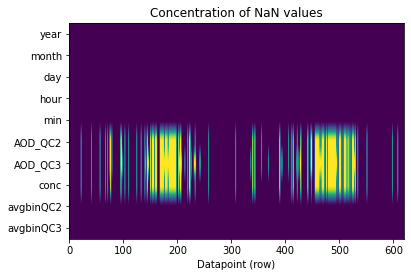

In [68]:
import matplotlib.pyplot as plt
plt.imshow(np.isnan(morning_concat).astype(int).T,aspect=40)
plt.yticks(np.arange(len(morning_concat.columns)),morning_concat.columns)
plt.title('Concentration of NaN values')
plt.xlabel('Datapoint (row)')
plt.show()